# Pretrained Networks

![CNN-Architecture-over-a-timeline](https://www.aismartz.com//blog/wp-content/uploads/2019/10/CNN-Architecture-over-a-timeline.jpg)

https://www.aismartz.com/blog/cnn-architectures/

+ WHAT?
    + it is a network which was trained on a large dataset on a large-scale-image classification Task. One can usit as it is for image classification or for transfer learning so we can custumise the model for a new task
    
+ BENEFITS
    + we don't have to train the model
    + very easy to incorporate 
    + fast simulation
    + we can achieve very good performaces
    
+ EXAMPLE
 + U net: recognize feature on medical images
 + MobileNet
 + VGG16/19
 + ResNet
 + InceptionV3
 
 [1000 different classes](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) that were used from the [Imagenet](https://www.image-net.org/update-mar-11-2021.php) dataset for training some of the pretrained models

In [1]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image # Keras own inbuild image class
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Model
from tensorflow import keras

Init Plugin
Init Graph Optimizer
Init Kernel


#### Load image from internet that belong under any of the 1000 classes

In [2]:
# Uncomment the next line and press tab after the '.' to see the different inbuilt models from keras
# from tensorflow.keras.applications.

In [3]:
img = image.load_img('object.png',target_size=(224,224)) # Reads the image as a PIL object and also you can resize to ur desired dimension(ideally the same shape as the one which the pretrained model is trained on)

In [4]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [5]:
#convert image to array, can also specify datatype
img = image.img_to_array(img,dtype='uint8')

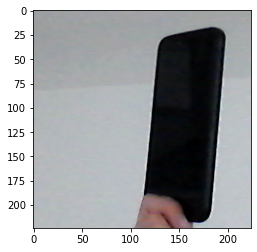

In [6]:
#plot image 
plt.imshow(img)

#### Load model

In [7]:
model = ResNet50()

Metal device set to: Apple M1


2022-05-12 14:35:58.957860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-12 14:35:58.957992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
img.shape

(224, 224, 3)

In [9]:
#show model summary
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### Preprocess

In [10]:
#https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
img = preprocess_input(img) # preprocess the image in the same method that is used for the pretrained model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


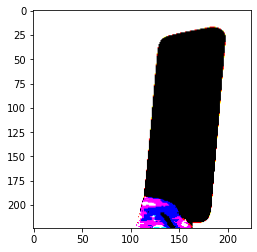

In [11]:
plt.imshow(img)

In [12]:
#check shape required by model
model.input.shape

TensorShape([None, 224, 224, 3])

In [13]:
img.shape

(224, 224, 3)

##### Expand dimensions

In [14]:
# Reshape to match the input shape required by the model
img = np.expand_dims(img,axis=0) # or img = img.reshape(1,224,224,3)

#### Predict

In [15]:
pred = model.predict(img)

2022-05-12 14:36:00.463608: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-12 14:36:00.463855: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-12 14:36:00.705269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [16]:
#shape of pred
pred.shape

(1, 1000)

In [17]:
# decode labels
decode_predictions(pred)

[[('n03041632', 'cleaver', 0.7736912),
  ('n04270147', 'spatula', 0.04690662),
  ('n04350905', 'suit', 0.026277754),
  ('n02883205', 'bow_tie', 0.017664105),
  ('n04208210', 'shovel', 0.0121261515)]]

## Let's have a look at the output of an intermediate convolution layer

In [18]:
#view model layers
model.layers

In [19]:
# choose your intermediate convolution layer to visualize the output at that layer
layer_name = model.layers[2].name
layer_name

'conv1_conv'

In [20]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [21]:
# Initial input:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [22]:
# Input to our chosen layer:
model.get_layer(layer_name).input

<KerasTensor: shape=(None, 230, 230, 3) dtype=float32 (created by layer 'conv1_pad')>

In [23]:
layer_output = model.get_layer(layer_name).output
layer_output

<KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_conv')>

In [24]:
intermediate_model = keras.models.Model(inputs=model.input, outputs=layer_output)

In [25]:
intermediate_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 230, 230, 3)       0         
_________________________________________________________________
conv1_conv (Conv2D)          (None, 112, 112, 64)      9472      
Total params: 9,472
Trainable params: 9,472
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Feature map:
feature_map=intermediate_model.predict(img)
feature_map.shape

2022-05-12 14:36:01.211414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(1, 112, 112, 64)

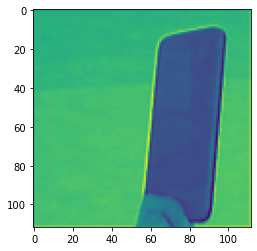

In [27]:
plt.imshow(feature_map[0,:,:,61])

# Transfer Learning

## Transfer Learning for Neural Networks

> Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. For instance, features from a model that has learned to identify racoons may be useful to kick-start a model meant to identify tanukis (japanese racoons).

__The benefits of transfer learning are:__
* you can reuse pre-trained networks
* it saves lots of training time
* it allows you to train with very small training datasets

__Procedure__
1. Take the weights and architecture of a [pre-trained network](https://keras.io/api/applications/)
2. Load the "convolutional base" of the model (everything except the final dense layers)
3. Freeze all the layers of the base (weights become fixed)
4. Add a fully connected dense layer on top
5. **Add a task specific dense output layer**
6. Compile and fit the model to your data

## Load images into `keras`
Keras has its own in build Objects and Methods to get image data in efficiently
See: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image

- `class ImageDataGenerator`: Generate batches of tensor image data with **optional** real-time data augmentation

In [28]:
# folder names containing images of the things you want to classify
classes = ['phone','wallet']
# plug in the path to your data folder
base_path ='data/'

In [29]:
# define an image data generator
data_gen = image.ImageDataGenerator(
    # define the preprocessing function that should be applied to all images
    preprocessing_function=preprocess_input,
     #rotation_range=45,
     #width_shift_range=0.2,
     #height_shift_range=0.2,
     #horizontal_flip=True, 
     #vertical_flip=True,
    #zoom_range=0.2,
    # shear_range=0.2    
)

In [30]:
# a generator that returns batches of X and y arrays
train_data_gen = data_gen.flow_from_directory(
        directory=base_path,
        class_mode="categorical",
        classes=classes,
        batch_size=30,
        target_size=(224, 224)
)

Found 150 images belonging to 2 classes.


In [31]:
# first 30 images , each time you rerun this the next set of 30 images will be displayed
xtrain, ytrain = next(train_data_gen)
xtrain.shape, ytrain.shape

((30, 224, 224, 3), (30, 2))

In [32]:
def plotImages(images_arr):
    fig, axes = plt.subplots(6, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

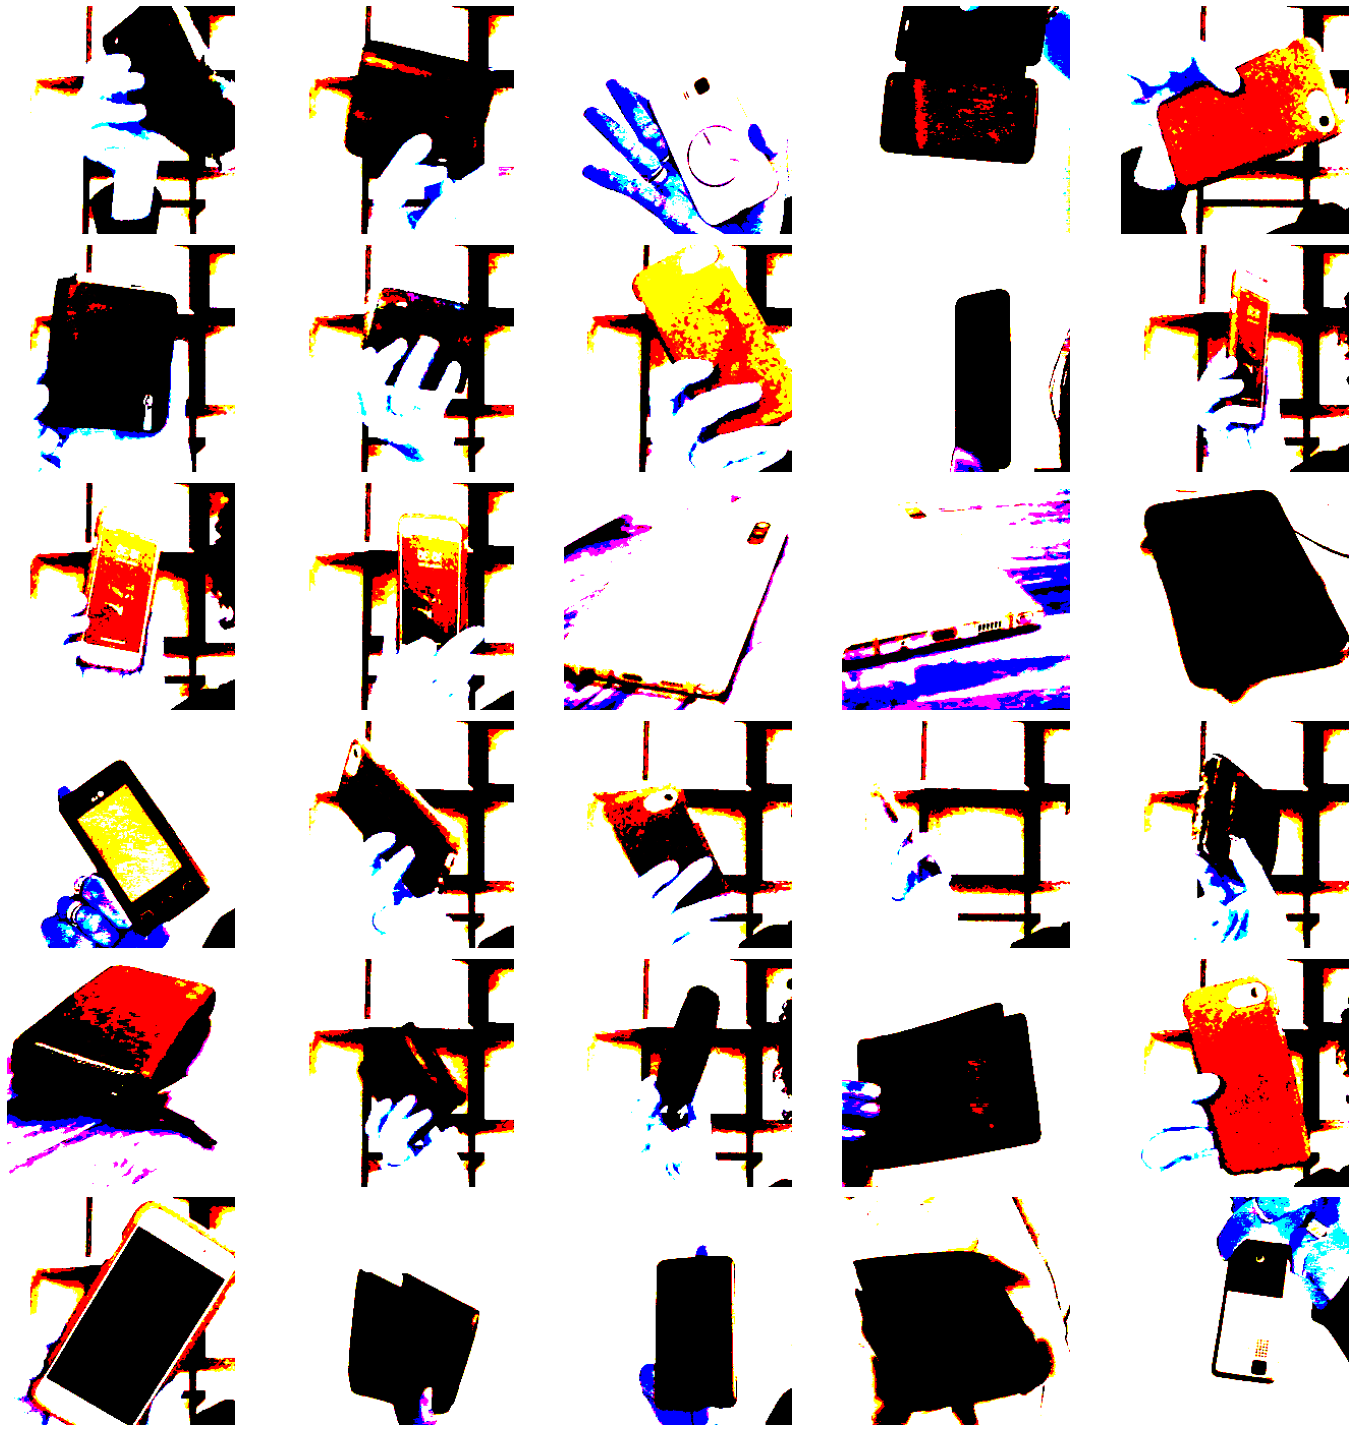

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [33]:
plotImages(xtrain)
print(ytrain)

In [34]:
classes

['phone', 'wallet']

In [35]:
ytrain

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

## Create CNN Model

### 1. Select the convolutional base 

In [36]:
# Transfer learning on MobileNet model
from tensorflow.keras.applications import mobilenet_v2
base_model = mobilenet_v2.MobileNetV2(
    weights='imagenet', 
    alpha=0.35,         # specific parameter of this model, small alpha reduces the number of overall weights
    pooling='avg',      # applies global average pooling to the output of the last conv layer (like a flattening)
    include_top=False,  # !!!!! we only want to have the base, not the final dense layers 
    input_shape=(224, 224, 3)
)

When loading a given model, the “include_top” argument can be set to False, in which case the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained.

### 2. Freeze the weights

In [37]:
# freeze it! , for making use of the weights that were already obtained with the pretrained model and to not retrain it again 
base_model.trainable = False

### 3. Add your own dense layers on top

In [38]:
model = keras.Sequential() # defining a new model
model.add(base_model) # adding in the pretrained model without the fully connected layer
model.add(keras.layers.Dense(100, activation='relu')) # adding in additional layers
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(len(classes), activation='softmax')) #!!! Final layer with a length of 2, and softmax activation 
# have a look at the trainable and non-trainable params statistic
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_0.35_224 (Functi (None, 1280)              410208    
_________________________________________________________________
dense (Dense)                (None, 100)               128100    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 538,510
Trainable params: 128,302
Non-trainable params: 410,208
_________________________________________________________________


In [39]:
len(classes)

2

### 4. Compile and train!

In [40]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

# observe the validation loss and stop when it does not improve after 3 iterations
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(xtrain, ytrain, 
          epochs=50, 
          verbose=2,
          batch_size=100, 
          callbacks=[callback],
          # use 30% of the data for validation
          validation_split=0.3)

Epoch 1/50


2022-05-12 14:36:04.495466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-12 14:36:05.186576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 - 2s - loss: 1.0041 - categorical_accuracy: 0.4286 - val_loss: 0.9424 - val_categorical_accuracy: 0.5556
Epoch 2/50
1/1 - 0s - loss: 0.5678 - categorical_accuracy: 0.7143 - val_loss: 1.0952 - val_categorical_accuracy: 0.4444
Epoch 3/50
1/1 - 0s - loss: 0.7779 - categorical_accuracy: 0.7143 - val_loss: 0.8765 - val_categorical_accuracy: 0.6667
Epoch 4/50
1/1 - 0s - loss: 0.3350 - categorical_accuracy: 0.7619 - val_loss: 0.7297 - val_categorical_accuracy: 0.5556
Epoch 5/50
1/1 - 0s - loss: 0.3600 - categorical_accuracy: 0.9048 - val_loss: 0.7088 - val_categorical_accuracy: 0.5556
Epoch 6/50
1/1 - 0s - loss: 0.3201 - categorical_accuracy: 0.9048 - val_loss: 0.7341 - val_categorical_accuracy: 0.6667
Epoch 7/50
1/1 - 0s - loss: 0.2279 - categorical_accuracy: 0.9048 - val_loss: 0.8166 - val_categorical_accuracy: 0.6667
Epoch 8/50
1/1 - 0s - loss: 0.2618 - categorical_accuracy: 0.8571 - val_loss: 0.9243 - val_categorical_accuracy: 0.5556


### (5. Use it to predict)

In [41]:
img = image.load_img('object.png',target_size=(224,224))

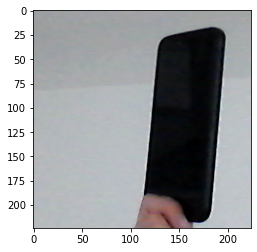

In [42]:
plt.imshow(img)

In [43]:
img.size

(224, 224)

In [44]:
a = image.img_to_array(img,dtype='uint8')

In [45]:
a = preprocess_input(a)

In [46]:
a = np.expand_dims(a, axis = 0)

In [47]:
a.shape

(1, 224, 224, 3)

In [48]:
model.evaluate(xtrain,ytrain)

1/1 [==============================] - 0s 307ms/step - loss: 0.3578 - categorical_accuracy: 0.8667


[0.35782578587532043, 0.8666667342185974]

In [49]:
model.predict(a)

2022-05-12 14:36:06.923795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.98052084, 0.01947911]], dtype=float32)

In [50]:
model.predict(a)[0].round(decimals = 3)

array([0.981, 0.019], dtype=float32)

In [51]:
classes

['phone', 'wallet']

<BarContainer object of 2 artists>

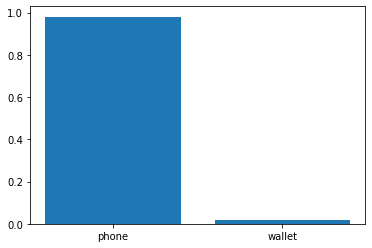

In [52]:
plt.bar(x = classes, height = model.predict(a)[0])

### (6. Save your model for later)

In [53]:
model.save('models/wallet_phone.h5')

/Users/arjunharidas/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


---
### Advanced Optional Step: Fine Tuning

This is done after the initial training! Adapt a few of the base layers to the specific learning task by retraining the model. This can improve accuracy, especially if the original learning task of the pre-trained model differs a lot from the actual task.

1. Unfreeze some (or all) of the layers in the convolutional base (starting with the base output layer)
2. Recompile your model and choose a very low learning rate (`1e-5`)
2. Continue training the model but stop early to avoid overfitting

#### (Advanced: Data augmentation)

> https://keras.io/guides/transfer_learning/

> https://www.tensorflow.org/tutorials/images/data_augmentation

Applies random distortions and transformations to the images (only on your training data!). You need to store your training and validation data at separate locations and use a second `ImageDataGenerator` for your validation data. 

---
---

## Our project: How to continue!

1. Have image data in the categories we want to classify: check
2. Have a model to use:
    - One or several pre-trained models
    - Train your own with transfer learning <-- will probably have the best performance
    - Take the challenge and train your own from scratch
4. Test on your data, evaluate, reflect

5. Save the model(s)

6. Load the trained model into `predict.py` (the modified `capture.py` with the `predict_frame(frame)` function) 


- If you don't have it yet, write a fuction `predict_frame(frame)` that uses the trained model to predict the object in the current frame. It should return a dictionary of class probabilities and names.
    - make sure that the input image to the model is of size (224, 224)
- Modify the script such that it makes a prediction once you press the `p` key
- Write the prediction as a log message to the terminal

### Advanced

- Display the result of the prediction on the current webcam frame
- Make an automatic prediction every second (Hint: the `while` loop has a speed of approx. 30 frames per second)

# Loading the entire images and labels into arrays

In [54]:
# Let's explore the data folder
base_path = 'data/'

# Let's define the classes
classes = os.listdir(base_path)

In [55]:
 for class_ in classes:
        print(class_)

wallet
phone


In [56]:
def load_image(base_path):
    """it loads all the image into X and the classes in y """
    X_list = []
    y_list = []
    classes = os.listdir(base_path)
    for class_ in classes:
        
        files = os.listdir(base_path+class_)
        for file in files:
            pic = image.load_img(path=base_path+class_+'/'+f'{file}',target_size=(224,224))
            numpy_image = np.array(pic)
            processed_image = preprocess_input(numpy_image)
            X_list.append(processed_image)
            y_list.append(class_)
        
    X = np.array(X_list)
    y = np.array(y_list)
    
    return X, y, classes

In [57]:
X,y,classes= load_image(base_path)

In [58]:
X.shape

(150, 224, 224, 3)

In [59]:
y

array(['wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'phone', 'phone', 'phone', 'phone',
       'phone', 'phone', 'phone', 'phone', 'phone', 'phone', 'phone',
       'phone', 'phone', 'phone', 'phone', 'phone', 'phone', 'phone',
       'phone', 'phone', 'phone', 'phone', 'phone'

In [60]:
my_dict = {"wallet":0, "phone":1}

In [61]:
# map strings to binary labels
y = np.vectorize(my_dict.get)(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])